In [2]:
import sys
sys.path.insert(0, 'caffe/python')
sys.path.insert(0, 'lib/data_layer/')
sys.path.insert(0, 'lib/data/')
sys.path.insert(0, 'lib/util/')
import caffe

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
prototxt = 'models/NYU/hand_lstm_small_frame_size/hand_lstm_small_frame_size.prototxt'
solver_prototxt = 'models/NYU/hand_lstm_small_frame_size/solver_hand_lstm_small_frame_size.prototxt'
weight_ = 'weights/NYU/hand_lstm_small_frame_size/hand_lstm_small_frame_size_iter_200000.caffemodel'
#net = caffe.Net(prototxt, weight_, caffe.TEST)
solver = caffe.SGDSolver(solver_prototxt)

In [ ]:
solver.net.forward()

In [ ]:
caffe.set_mode_gpu()
caffe.set_device(0)
import time
t_start = time.time()

predicted_joints = np.array([None]* 8252)

for i in xrange(np.int(np.ceil(8252./ net.blobs['inds'].data.shape[0]))):
    net.forward()
    print 'iter = ', i
    for j, ind in enumerate(net.blobs['inds'].data):
        row = j / 32
        col = j % 32
        #print 'j = ', ind
        #print 'ind = ',ind
        #print 'gt joint = ', net.blobs['reshape-joint'].data[row][col].reshape(14, 3)
        #print 'pred joint = ', net.blobs['pred_joint'].data[row][col].reshape(14, 3)
        #gt_joint = (net.blobs['reshape-joint'].data[row][col].reshape(14, 3) * net.blobs['config'].data[0][0]/2 + net.blobs['com'].data[0].reshape(1, 3)).copy()
        if predicted_joints[int(ind) - 1] == None:
            predicted_joints[int(ind) - 1] = (net.blobs['pred_joint'].data[row][col].reshape(14, 3)  * net.blobs['config'].data[j][0]/2 + net.blobs['com'].data[j].reshape(1, 3)).copy()
        #print 'gt3D joint = ', gt_joint
        #print 'pred joint = ', predicted_joints[int(ind) - 1]
        #input()
t_end = time.time()
print 'time elapse {}'.format((t_end - t_start) / 8252)

In [ ]:
with open('../results/OURS/hand_lstm_160000.txt', 'w') as f:
    for i in xrange(predicted_joints.shape[0]):
        for item in predicted_joints[i].reshape(14*3):
            f.write("%s "% item)
        f.write("\n")

In [ ]:
solver = None
solver = caffe.AdamSolver(solver_prototxt)
solver.net.forward()
solver.test_nets[0].forward()

In [ ]:
def vis_square(data):
    """Take an array of shape (n, height, width) or (n, height, width, 3)
       and visualize each (height, width) thing in a grid of size approx. sqrt(n) by sqrt(n)"""
    
    # normalize data for display
    data = (data - data.min()) / (data.max() - data.min())
    
    # force the number of filters to be square
    n = int(np.ceil(np.sqrt(data.shape[0])))
    padding = (((0, n ** 2 - data.shape[0]),
               (0, 1), (0, 1))                 # add some space between filters
               + ((0, 0),) * (data.ndim - 3))  # don't pad the last dimension (if there is one)
    data = np.pad(data, padding, mode='constant', constant_values=1)  # pad with ones (white)

    # tile the filters into an image
    data = data.reshape((n, n) + data.shape[1:]).transpose((0, 2, 1, 3) + tuple(range(4, data.ndim + 1)))
    data = data.reshape((n * data.shape[1], n * data.shape[3]) + data.shape[4:])
    
    plt.imshow(data); plt.axis('off')

In [ ]:
net.blobs['fc1'].data[1]

In [ ]:
net.blobs['reshape-data'].data[0][1]

In [ ]:
plt.hist(net.blobs['lstm'].data[0])

### realtime test

In [ ]:
import numpy as np
import sys
sys.path.insert(0, './caffe/python')
sys.path.insert(0, './lib')
import matplotlib.pyplot as plt
import os
import caffe
import scipy.io as scio

In [ ]:
from data.importers import NYUImporter
from data.dataset import NYUDataset

In [ ]:
di = NYUImporter('dataset/NYU')
seq1 = di.loadSequence('test_1')
seq2 = di.loadSequence('test_2')

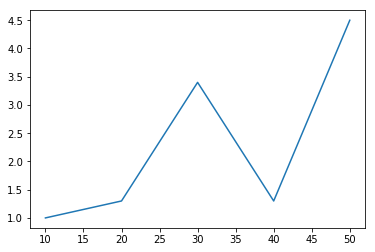

In [3]:
a = [10, 20, 30, 40, 50]
b = [1, 1.3, 3.4, 1.3, 4.5]
plt.plot(a, b)